<a href="https://colab.research.google.com/github/ykato27/Regression-Models/blob/main/GPy%E3%82%92%E5%88%A9%E7%94%A8%E3%81%97%E3%81%A6%E3%82%AC%E3%82%A6%E3%82%B9%E9%81%8E%E7%A8%8B%E3%81%AB%E3%82%88%E3%82%8B%E3%81%8A%E6%89%8B%E8%BB%BD%E3%81%AA%E9%9D%9E%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%82%92%E8%A1%8C%E3%81%86%E3%83%AC%E3%82%B7%E3%83%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gpy==1.9.9
!pip install gpyopt==1.2.6
!pip install matplotlib==3.1.3
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 995 kB 13.3 MB/s 
     |████████████████████████████████| 71 kB 5.7 MB/s 
  Created wheel for gpy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2627177 sha256=9b884bba815c47467830e71203b6829e3ee79f88f8294c2ebb65465ab674212b
  Stored in directory: /root/.cache/pip/wheels/e4/05/38/b84c6bec7ea9dc623cdbdb6203b55b3abe7a7020a992f2064c
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=cf26c3ffa2ec902f688b696b6d65c2980804db2a3f13cfb6a155eb515fd76a5f
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz
     |████████████████████████████████| 56 kB 2.9 MB/s 
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83609 sha256=45ad99efc0b93c10fed2b35fc8afb3a7712473fc3c298c50c922e64a9997cb57
  Stored in directory: /root/.cache/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
Successfully built gp

     |████████████████████████████████| 22.3 MB 80.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import warnings

warnings.simplefilter("ignore", RuntimeWarning)

#### 1次元非線形関数の推定(基本編)

In [3]:
import numpy as np

np.random.seed(1234)  # 結果の再現性のために乱数のシード値を固定

# 推定対象となる真の関数
def f_true(x):
    return 3 * np.sin(x) + x


n_sample = 20  # データ数
x_range = (-5, 5)  # 入力の範囲
noise_v = 0.25  # 観測ノイズの分散

# データの生成
X = np.random.uniform(*x_range, n_sample)  # x_rangeの範囲から一様分布に従ってサンプリング
Y = f_true(X) + np.random.normal(
    scale=np.sqrt(noise_v), size=n_sample
)  # 出力値には正規分布に従う観測ノイズを付加

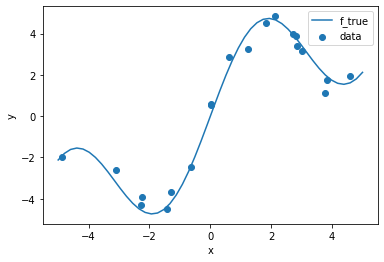

In [4]:
import matplotlib.pyplot as plt

x_lin = np.linspace(*x_range, 50)
y_true = f_true(x_lin)

fig, ax = plt.subplots()
ax.plot(x_lin, y_true, label="f_true")
ax.scatter(X, Y, label="data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [5]:
import GPy

# GPRegressionのモデルにデータを入力
model = GPy.models.GPRegression(X[:, np.newaxis], Y[:, np.newaxis])

# モデルの情報を表示
model

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


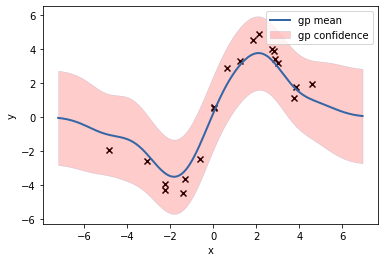

In [6]:
# モデルのプロット用の関数を定義
def plot_model(model, x_range=None):
    fig, ax = plt.subplots()
    model.plot_data(ax=ax)  # モデルに渡したデータを散布図でプロット
    model.plot_mean(ax=ax, plot_limits=x_range)  # 予測値をプロット
    model.plot_confidence(
        ax=ax, plot_limits=x_range, color="red"
    )  # 予測の信頼領域をプロット (見やすさのため色を赤に変更)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.show()


# プロット
plot_model(model)

In [7]:
model.optimize()  # ハイパーパラメーターの最適化

model

GP_regression.,value,constraints,priors
rbf.variance,7.390798615550074,+ve,
rbf.lengthscale,1.2637152157548108,+ve,
Gaussian_noise.variance,0.11671772983337678,+ve,


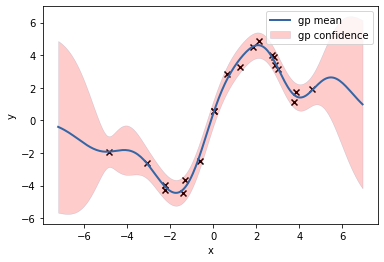

In [8]:
plot_model(model)  # ハイパーパラメータ最適化後のモデルをプロット

#### 1次元非線形関数の推定(応用編)

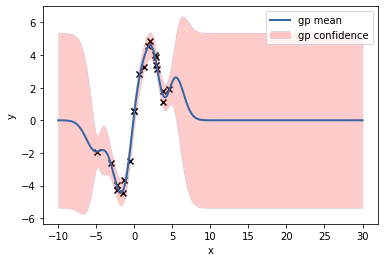

GP_regression.,value,constraints,priors
rbf.variance,7.390798615550074,+ve,
rbf.lengthscale,1.2637152157548108,+ve,
Gaussian_noise.variance,0.11671772983337678,+ve,


In [9]:
kernel_rbf = GPy.kern.RBF(input_dim=1)  # RBFカーネル
model_rbf = GPy.models.GPRegression(
    X[:, np.newaxis], Y[:, np.newaxis], kernel=kernel_rbf
)  # RBFカーネルを用いてモデルを構築

model_rbf.optimize()  # 　ハイパーパラメータの最適化

plot_model(
    model_rbf, x_range=(-10, 30)
)  # データ範囲の外側の予測値を見るためにx_rangeを広く取って予測をプロット

model_rbf

#### 線形カーネル
- 線形カーネルでは内積を用いて「近さ」を計算している．
- 線形カーネルによるガウス過程回帰は通常の線形回帰モデルと等価である．

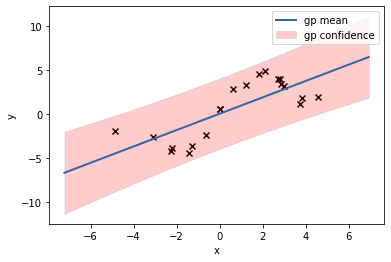

GP_regression.,value,constraints,priors
linear.variances,0.8922004068583531,+ve,
Gaussian_noise.variance,4.187136565908971,+ve,


In [10]:
kernel_linear = GPy.kern.Linear(input_dim=1)  # 線形カーネル
model_linear = GPy.models.GPRegression(
    X[:, np.newaxis], Y[:, np.newaxis], kernel=kernel_linear
)  # 線形カーネルを用いてモデルを構築

model_linear.optimize()  # 　ハイパーパラメータの最適化

plot_model(model_linear)  # 予測をプロット

model_linear

#### 周期カーネル
- 周期カーネルを用いることで周期性を捉えることができる．
- 周期カーネルにはsin関数が用いられていて， 位相が近いほどその値が大きくなる．

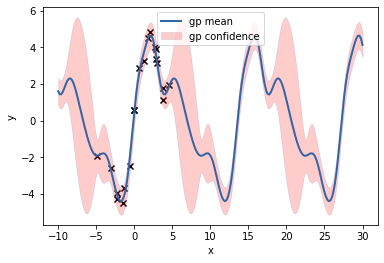

GP_regression.,value,constraints,priors
std_periodic.variance,7.271075533093552,+ve,
std_periodic.period,13.68290349897606,+ve,
std_periodic.lengthscale,0.2845593680043589,+ve,
Gaussian_noise.variance,0.10086658518561283,+ve,


In [11]:
kernel_periodic = GPy.kern.StdPeriodic(input_dim=1)  # (標準)周期カーネル
model_periodic = GPy.models.GPRegression(
    X[:, np.newaxis], Y[:, np.newaxis], kernel=kernel_periodic
)  # 周期カーネルを用いてモデルを構築

np.random.seed(1234)  # 結果の再現性のためにseed値を固定
model_periodic.optimize_restarts(
    num_restarts=50, verbose=False
)  # 最適化を50回行い最も良い結果を採用

plot_model(model_periodic, x_range=(-10, 30))  # 周期性確認のためにx_rangeを広く取って予測をプロット

model_periodic

#### カーネルのカスタマイズ
- カーネル関数の和や積はカーネル関数になるので， 既存のカーネル関数を組み合わせて新たなカーネル関数を作ることができる．
- 例えば線形カーネルと周期カーネルを足すことで，トレンド成分と周期成分を考慮した時系列解析などが可能となる．

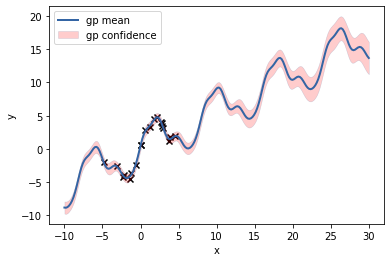

GP_regression.,value,constraints,priors
sum.linear.variances,0.3091890173134937,+ve,
sum.std_periodic.variance,5.386277166381049,+ve,
sum.std_periodic.period,8.046787234903526,+ve,
sum.std_periodic.lengthscale,0.41753691946189986,+ve,
Gaussian_noise.variance,0.07333306108282735,+ve,


In [12]:
kernel_custom = GPy.kern.Linear(input_dim=1) + GPy.kern.StdPeriodic(
    input_dim=1
)  # 線形カーネルと周期カーネルを足してカーネル関数を作る
model_custom = GPy.models.GPRegression(
    X[:, np.newaxis], Y[:, np.newaxis], kernel=kernel_custom
)

np.random.seed(1234)  # 結果の再現性のためにseed値を固定
model_custom.optimize_restarts(
    num_restarts=50, verbose=False
)  # 　最適化を50回行い最も良い結果を採用

plot_model(model_custom, x_range=(-10, 30))  # 予測をプロット

model_custom

#### 多次元非線形関数の推定

In [13]:
np.random.seed(1234)  # 結果の再現性のために乱数のシード値を固定

# 推定対象となる真の関数
def f_true_2dim(x1, x2):
    return 3 * np.sin(x1) + 5 * np.cos(x2 / 2 - 2)


n_sample_2dim = 30  # データ数
x_range_2dim = (-5, 5)  # 入力の範囲(x1, x2どちらも同じ)
noise_v_2dim = 0.25  # 観測ノイズの分散

# データの生成
X_2dim = np.random.uniform(
    *x_range_2dim, (n_sample_2dim, 2)
)  # (30, 2)のサイズのデータをx_rangeの範囲から一様分布に従ってサンプリング
Y_2dim = f_true_2dim(X_2dim[:, 0], X_2dim[:, 1])  # 真の関数の出力値を計算
Y_2dim += np.random.normal(
    scale=np.sqrt(noise_v_2dim), size=n_sample_2dim
)  # 正規分布に従う観測ノイズを付加

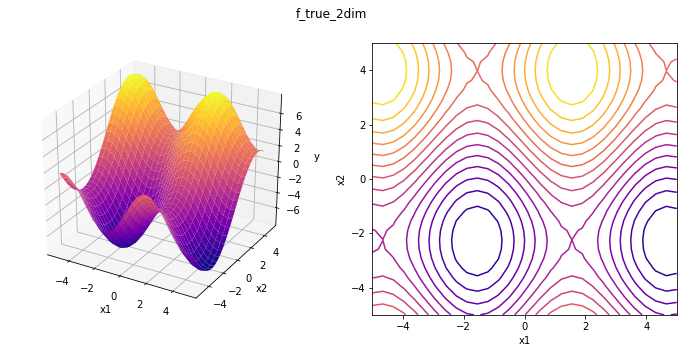

In [14]:
from mpl_toolkits.mplot3d import Axes3D

x1_lin = np.linspace(*x_range_2dim, 30)
x2_lin = np.linspace(*x_range_2dim, 30)
x1_lin, x2_lin = np.meshgrid(x1_lin, x2_lin)

y_true_2dim = f_true_2dim(x1_lin, x2_lin)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(x1_lin, x2_lin, y_true_2dim, cmap="plasma")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("y")

ax2 = fig.add_subplot(122)
ax2.contour(x1_lin, x2_lin, y_true_2dim, levels=15, cmap="plasma")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

fig.suptitle("f_true_2dim")

plt.show()

In [15]:
model_2dim = GPy.models.GPRegression(
    X_2dim, Y_2dim[:, np.newaxis]
)  # Y_2dimのみ(30,)の1次元データなので2次元にして渡す

# ハイパーパラメータの最適化
model_2dim.optimize()

# モデルの表示
model_2dim

GP_regression.,value,constraints,priors
rbf.variance,16.632040843291264,+ve,
rbf.lengthscale,2.295257091668725,+ve,
Gaussian_noise.variance,0.16541351897896936,+ve,


 /usr/local/lib/python3.7/dist-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


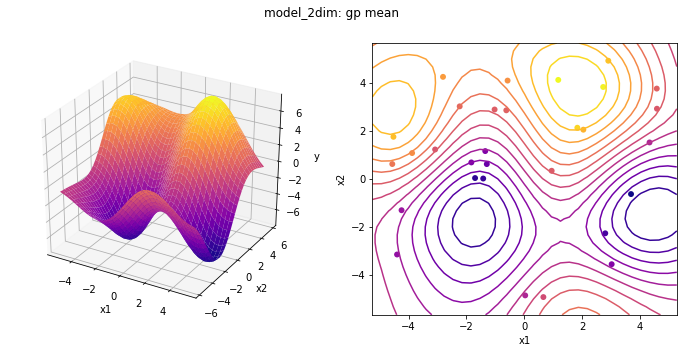

In [16]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection="3d")
model_2dim.plot_mean(ax=ax1, projection="3d", cmap="plasma", alpha=1)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("y")

ax2 = fig.add_subplot(122)
model_2dim.plot_mean(ax=ax2, levels=15, cmap="plasma")
model_2dim.plot_data(ax=ax2, cmap="plasma", alpha=1)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

fig.suptitle("model_2dim: gp mean")

plt.show()

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Bostonデータの読み込み
boston = load_boston()

# 入力X, 出力yをそれぞれ学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=1234
)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 線形回帰モデルにデータを渡す．
lr = LinearRegression()
lr.fit(X_train, y_train)

# テストデータについて予測を行う．
y_pred_linear = lr.predict(X_test)

# 予測の平均二乗誤差を計算する．
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_linear))

Mean Squared Error:  16.921385346235343


In [19]:
# ガウス過程モデルにデータを渡す．
model_boston = GPy.models.GPRegression(X_train, y_train[:, np.newaxis])

# ハイパーパラメータの最適化
model_boston.optimize()

# テストデータについて予測分布の平均と分散をそれぞれ計算する．
y_pred_gp_mean, y_pred_gp_var = model_boston.predict(X_test)

# 予測値の平均二乗誤差を計算する．
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_gp_mean))

Mean Squared Error:  13.5930435190983


#### GPyOptを利用したベイズ最適化

In [20]:
x_range_gpyopt = (-1, 3)  # 入力の範囲
np.random.seed(1234)  # 再現性のためにseed値を固定

# 最適化対象の関数
def f_true_gpyopt(x):
    return 3 * np.sin(x * x) - x

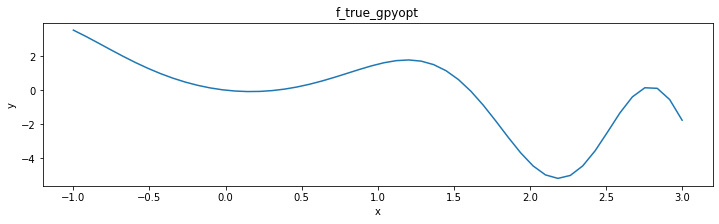

In [21]:
x_lin_gpyopt = np.linspace(*x_range_gpyopt, 50)
x_true_gpyopt = f_true_gpyopt(x_lin_gpyopt)

fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(x_lin_gpyopt, x_true_gpyopt)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("f_true_gpyopt")
plt.show()

In [22]:
import GPyOpt

# 入力の定義域を定める．
# 今回は変数名がxで範囲(-1, 3)の連続値
domain = [{"name": "x", "type": "continuous", "domain": x_range_gpyopt}]

# モデル定義
Bopt = GPyOpt.methods.BayesianOptimization(
    f=f_true_gpyopt,  # 最適化対象の関数
    domain=domain,  # 入力の定義域
    acquisition_type="LCB",  # 入力値の提案手法
    exact_feval=True,  # モデルに観測ノイズを仮定するか (exact_fevalがTrueなら観測ノイズなし)
    normalize_Y=False,  # ガウス過程に与えるyの正規化を行うか
    initial_design_numdata=1,  # 初期状態のデータ数
)

In [23]:
# 次に探索すべき入力とそのacquisition_function(今回はLCB)の値を計算する関数
def get_next_point(bopt):
    next_x = bopt.suggest_next_locations()  # 次の入力値を提案
    next_acq = bopt.acquisition.acquisition_function(next_x)  # LCB(next_x)の計算
    return next_x[0][0], next_acq[0][0]


# ベイズ最適化の様子をプロットする関数
def plot_gpyopt(bopt, x_range=None):
    fig, ax = plt.subplots(figsize=(12, 3))

    # ベイズ最適化モデルに内包されるガウス過程モデルのプロット
    gp_model = bopt.model.model
    gp_model.plot_data(ax=ax)
    gp_model.plot_mean(ax=ax, plot_limits=x_range)
    gp_model.plot_confidence(ax=ax, plot_limits=x_range, color="red")

    # 次に探索すべき入力のプロット
    next_x, next_acq = get_next_point(bopt)
    ax.scatter(next_x, next_acq, label="sugest", marker="o", color="red")

    # ここまでに得られているデータ数
    sample_size = len(gp_model.X)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"sample size: {sample_size}")

    plt.show()

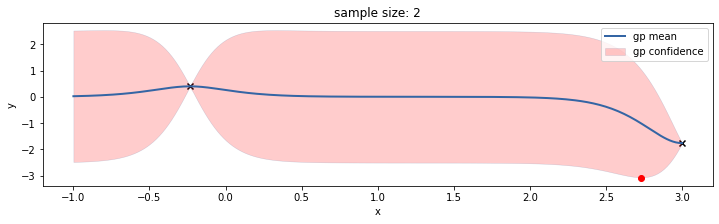

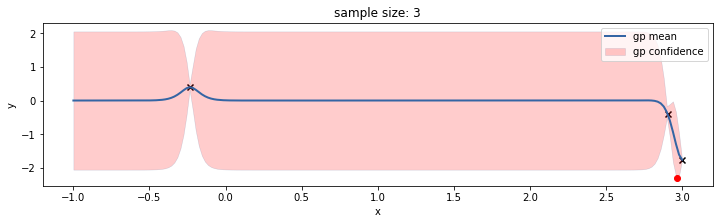

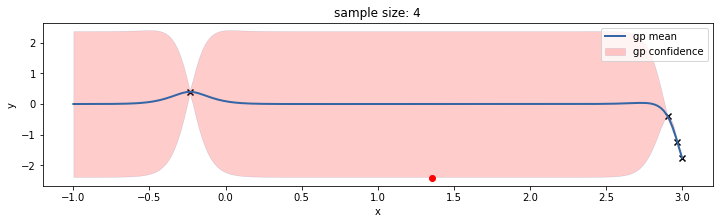

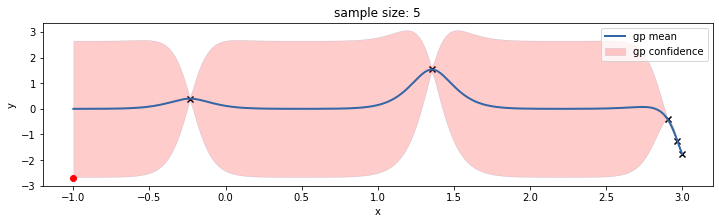

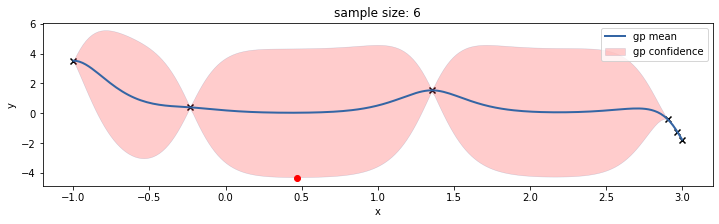

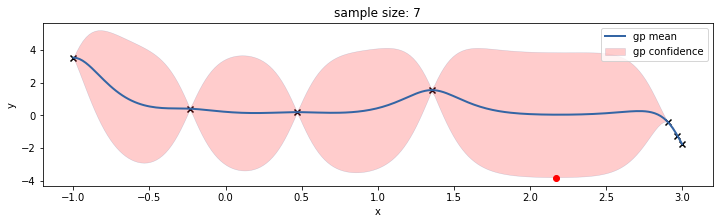

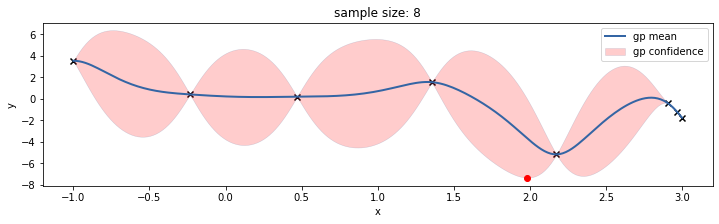

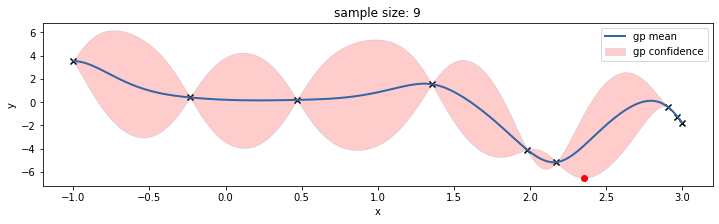

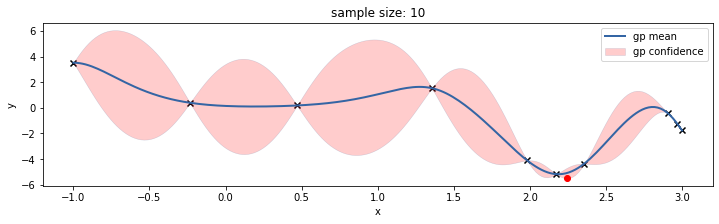

In [24]:
for i in range(9):
    Bopt.run_optimization(max_iter=1)  # 1回分の最適化計算
    plot_gpyopt(Bopt, x_range_gpyopt)  # モデルのプロット